In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/job_descriptions.csv', engine='python', on_bad_lines='skip')

In [ ]:
data.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [ ]:
data.shape

(25256, 23)

In [ ]:
data.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.drop_duplicates(keep=False , inplace=True)

In [ ]:
def clean_columns(col):
    parts = col.strip().split()
    return '_'.join(part.lower() for part in parts)

data.columns = [clean_columns(col) for col in data.columns]


In [ ]:
data.columns

Index(['job_id', 'experience', 'qualifications', 'salary_range', 'location',
       'country', 'latitude', 'longitude', 'work_type', 'company_size',
       'job_posting_date', 'preference', 'contact_person', 'contact',
       'job_title', 'role', 'job_portal', 'job_description', 'benefits',
       'skills', 'responsibilities', 'company', 'company_profile'],
      dtype='object')

In [ ]:
data.head()

,job_id,experience,qualifications,salary_range,location,country,latitude,longitude,work_type,company_size,...,contact,job_title,role,job_portal,job_description,benefits,skills,responsibilities,company,company_profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [ ]:
data['company_profile'].value_counts()

,count
company_profile,
"{""Sector"":""Automotive"",""Industry"":""Automotive"",""City"":""Munich"",""State"":""N/A"",""Zip"":""N/A"",""Website"":""www.bmwgroup.com"",""Ticker"":""BMW"",""CEO"":""Oliver Zipse""}",61
"{""Sector"":""Food & Beverage"",""Industry"":""Food Consumer Products"",""City"":""Camden"",""State"":""New Jersey"",""Zip"":""8103"",""Website"":""www.campbellsoupcompany.com"",""Ticker"":""CPB"",""CEO"":""Mark A. Clouse""}",48
"{""Sector"":""Real Estate"",""Industry"":""Internet Services and Retailing"",""City"":""Tempe"",""State"":""Arizona"",""Zip"":""85281"",""Website"":""www.opendoor.com"",""Ticker"":""OPEN"",""CEO"":""Carrie Wheeler""}",47
"{""Sector"":""Banking"",""Industry"":""Commercial Banks"",""City"":""Cincinnati"",""State"":""Ohio"",""Zip"":""45263"",""Website"":""www.53.com"",""Ticker"":""FITB"",""CEO"":""Tim Spence""}",43
"{""Sector"":""Chemicals"",""Industry"":""Chemicals"",""City"":""D sseldorf"",""State"":""N/A"",""Zip"":""N/A"",""Website"":""www.henkel.com"",""Ticker"":""HEN"",""CEO"":""Carsten Knobel""}",43
...,...
"{""Sector"":""Utilities"",""Industry"":""Utilities"",""City"":""Gurugram"",""State"":""Haryana"",""Zip"":""122002"",""Website"":""https://www.powergridindia.com/"",""Ticker"":""POWERGRID"",""CEO"":""Kandikuppa Sreekant""}",16
"{""Sector"":""Automotive"",""Industry"":""Automotive"",""City"":""Wolfsburg"",""State"":""N/A"",""Zip"":""N/A"",""Website"":""www.volkswagenag.com"",""Ticker"":""VOW3"",""CEO"":""Herbert Diess""}",16
"{""Sector"":""Information Technology"",""Industry"":""Information Technology and Services"",""City"":""Mumbai"",""State"":""Maharashtra"",""Zip"":""400001"",""Website"":""www.tcs.com"",""Ticker"":""TCS"",""CEO"":""Rajesh Gopinathan""}",16


In [ ]:
# If the JSON is stored as strings, first parse them
import json

def safe_json_parse(x):
    if pd.isna(x):
        return {}  # or return None
    try:
        return json.loads(x)
    except:
        return {}  # return empty dict for invalid JSON

data['company_profile_parsed'] = data['company_profile'].apply(safe_json_parse)


In [ ]:
json_df = pd.json_normalize(data['company_profile_parsed'])

In [ ]:
json_df

,Sector,Industry,City,State,Zip,Website,Ticker,CEO
0,Diversified,Diversified Financials,Sunny Isles Beach,Florida,33160,www.ielp.com,IEP,David Willetts
1,Financial Services,Commercial Banks,Pittsburgh,Pennsylvania,15222,www.pnc.com,PNC,William S. Demchak
2,Insurance,Insurance: Property and Casualty (Stock),San Antonio,Texas,78288,www.usaa.com,,Wayne Peacock
3,Energy,"Mining, Crude-Oil Production",New York,New York,10036,www.hess.com,HES,John B. Hess
4,Energy,Energy - Oil & Gas Exploration & Production,Edinburgh,Scotland,EH2 4NH,https://www.cairnenergy.com/,CNE,Simon Thomson
...,...,...,...,...,...,...,...,...
25251,Financial Services,Securities,San Mateo,California,94403,www.franklinresources.com,BEN,Jenny Johnson
25252,Real Estate/Logistics,Real Estate,Sydney,NSW,2000,https://www.goodman.com/,GMG,Greg Goodman
25253,Natural Gas,Gas and Energy,New Delhi,Delhi,110016,https://www.gailonline.com/,GAIL,Manoj Jain
25254,Entertainment,"Hotels, Casinos, Resorts",Reno,Nevada,89501,www.caesars.com,CZR,Thomas R. Reeg


In [ ]:
data_expanded = pd.concat([data.drop(['company_profile', 'company_profile_parsed'], axis=1), json_df], axis=1)

In [ ]:
data_expanded.head()

,job_id,experience,qualifications,salary_range,location,country,latitude,longitude,work_type,company_size,...,responsibilities,company,Sector,Industry,City,State,Zip,Website,Ticker,CEO
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,"Manage and grow social media accounts, create ...",Icahn Enterprises,Diversified,Diversified Financials,Sunny Isles Beach,Florida,33160,www.ielp.com,IEP,David Willetts
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,"Design and code user interfaces for websites, ...",PNC Financial Services Group,Financial Services,Commercial Banks,Pittsburgh,Pennsylvania,15222,www.pnc.com,PNC,William S. Demchak
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Establish and enforce quality control standard...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),San Antonio,Texas,78288,www.usaa.com,,Wayne Peacock
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,"Design, configure, and optimize wireless netwo...",Hess,Energy,"Mining, Crude-Oil Production",New York,New York,10036,www.hess.com,HES,John B. Hess
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Specialize in conference and convention planni...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,Edinburgh,Scotland,EH2 4NH,https://www.cairnenergy.com/,CNE,Simon Thomson


In [ ]:
data_expanded.shape

(25256, 30)

In [ ]:
data_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25256 entries, 0 to 25255
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_id            25256 non-null  int64  
 1   experience        25256 non-null  object 
 2   qualifications    25256 non-null  object 
 3   salary_range      25256 non-null  object 
 4   location          25256 non-null  object 
 5   country           25256 non-null  object 
 6   latitude          25256 non-null  float64
 7   longitude         25256 non-null  float64
 8   work_type         25256 non-null  object 
 9   company_size      25256 non-null  int64  
 10  job_posting_date  25256 non-null  object 
 11  preference        25256 non-null  object 
 12  contact_person    25256 non-null  object 
 13  contact           25256 non-null  object 
 14  job_title         25256 non-null  object 
 15  role              25256 non-null  object 
 16  job_portal        25256 non-null  object

In [ ]:
data_expanded.isnull().sum()

,0
job_id,0
experience,0
qualifications,0
salary_range,0
location,0
country,0
latitude,0
longitude,0
work_type,0
company_size,0


In [ ]:
missing_values=pd.DataFrame({
    'Missing Value': data_expanded.isnull().sum(),
    'Percentage': (data_expanded.isnull().sum() / len(data_expanded))*100
})


In [ ]:
missing_values


,Missing Value,Percentage
job_id,0,0.000000
experience,0,0.000000
qualifications,0,0.000000
salary_range,0,0.000000
location,0,0.000000
country,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
work_type,0,0.000000
company_size,0,0.000000


In [ ]:
data_expanded.dropna(inplace=True)


In [ ]:
data_expanded.shape

(25147, 30)

In [ ]:
data_expanded.describe()

,job_id,latitude,longitude,company_size
count,2.514700e+04,25147.000000,25147.000000,25147.000000
mean,1.552977e+15,19.075286,16.380645,73647.321072
std,8.966818e+14,23.445341,71.413723,35375.484711
min,2.018175e+11,-40.900600,-175.198200,12648.000000
25%,7.723538e+14,4.570900,-15.180400,42702.000000
50%,1.560096e+15,17.607800,19.374400,73671.000000
75%,2.325755e+15,38.969700,48.516400,104061.500000
max,3.099079e+15,71.706900,178.065000,134831.000000


In [ ]:
data_expanded.head()

,job_id,experience,qualifications,salary_range,location,country,latitude,longitude,work_type,company_size,...,responsibilities,company,Sector,Industry,City,State,Zip,Website,Ticker,CEO
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,"Manage and grow social media accounts, create ...",Icahn Enterprises,Diversified,Diversified Financials,Sunny Isles Beach,Florida,33160,www.ielp.com,IEP,David Willetts
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,"Design and code user interfaces for websites, ...",PNC Financial Services Group,Financial Services,Commercial Banks,Pittsburgh,Pennsylvania,15222,www.pnc.com,PNC,William S. Demchak
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Establish and enforce quality control standard...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),San Antonio,Texas,78288,www.usaa.com,,Wayne Peacock
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,"Design, configure, and optimize wireless netwo...",Hess,Energy,"Mining, Crude-Oil Production",New York,New York,10036,www.hess.com,HES,John B. Hess
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Specialize in conference and convention planni...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,Edinburgh,Scotland,EH2 4NH,https://www.cairnenergy.com/,CNE,Simon Thomson


In [ ]:
experience_split = data_expanded['experience'].str.extract(r'(\d+)\s*to\s*(\d+)')
experience_split.columns = ['min_experience', 'max_experience']
experience_split = experience_split.astype(float)


In [ ]:
data_expanded['avg_experience'] = experience_split.mean(axis=1)
data_expanded['min_experience'] = experience_split['min_experience']
data_expanded['max_experience'] = experience_split['max_experience']

In [ ]:
data_expanded.head()

,job_id,experience,qualifications,salary_range,location,country,latitude,longitude,work_type,company_size,...,Industry,City,State,Zip,Website,Ticker,CEO,avg_experience,min_experience,max_experience
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,Diversified Financials,Sunny Isles Beach,Florida,33160,www.ielp.com,IEP,David Willetts,10.0,5.0,15.0
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,Commercial Banks,Pittsburgh,Pennsylvania,15222,www.pnc.com,PNC,William S. Demchak,7.0,2.0,12.0
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Insurance: Property and Casualty (Stock),San Antonio,Texas,78288,www.usaa.com,,Wayne Peacock,6.0,0.0,12.0
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,"Mining, Crude-Oil Production",New York,New York,10036,www.hess.com,HES,John B. Hess,7.5,4.0,11.0
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Energy - Oil & Gas Exploration & Production,Edinburgh,Scotland,EH2 4NH,https://www.cairnenergy.com/,CNE,Simon Thomson,6.5,1.0,12.0


In [ ]:
# Step 1: Clean the salary column (remove $ and K)
salary_cleaned = data_expanded['salary_range'].str.replace(r'[\$,K]', '', regex=True)

# Step 2: Extract min and max salary
salary_split = salary_cleaned.str.extract(r'(\d+(?:\.\d+)?)\s*(?:to|\-)\s*(\d+(?:\.\d+)?)')
salary_split.columns = ['min_salary', 'max_salary']
salary_split = salary_split.astype(float)

# Step 3: Assign min, max, avg to the main DataFrame
data_expanded['min_salary'] = salary_split['min_salary'] * 1000  # since values were in 'K'
data_expanded['max_salary'] = salary_split['max_salary'] * 1000
data_expanded['avg_salary'] = data_expanded[['min_salary', 'max_salary']].mean(axis=1)


In [ ]:
data_expanded.head()

,job_id,experience,qualifications,salary_range,location,country,latitude,longitude,work_type,company_size,...,Zip,Website,Ticker,CEO,avg_experience,min_experience,max_experience,min_salary,max_salary,avg_salary
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,33160,www.ielp.com,IEP,David Willetts,10.0,5.0,15.0,59000.0,99000.0,79000.0
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,15222,www.pnc.com,PNC,William S. Demchak,7.0,2.0,12.0,56000.0,116000.0,86000.0
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,78288,www.usaa.com,,Wayne Peacock,6.0,0.0,12.0,61000.0,104000.0,82500.0
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,10036,www.hess.com,HES,John B. Hess,7.5,4.0,11.0,65000.0,91000.0,78000.0
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,EH2 4NH,https://www.cairnenergy.com/,CNE,Simon Thomson,6.5,1.0,12.0,64000.0,87000.0,75500.0


In [ ]:
!pip install -q pandasql


  Preparing metadata (setup.py) ... done


In [ ]:

import pandasql as psql

In [ ]:
data_expanded.columns

Index(['job_id', 'experience', 'qualifications', 'salary_range', 'location',
       'country', 'latitude', 'longitude', 'work_type', 'company_size',
       'job_posting_date', 'preference', 'contact_person', 'contact',
       'job_title', 'role', 'job_portal', 'job_description', 'benefits',
       'skills', 'responsibilities', 'company', 'Sector', 'Industry', 'City',
       'State', 'Zip', 'Website', 'Ticker', 'CEO', 'avg_experience',
       'min_experience', 'max_experience', 'min_salary', 'max_salary',
       'avg_salary'],
      dtype='object')

In [ ]:
data_expanded['job_title']

,job_title
0,Digital Marketing Specialist
1,Web Developer
2,Operations Manager
3,Network Engineer
4,Event Manager
...,...
25251,Mechanical Engineer
25252,Software Engineer
25253,Java Developer
25254,Wedding Planner


Job count By country

In [ ]:
query = """
SELECT country, COUNT(*) AS job_count
FROM data_expanded
GROUP BY country
ORDER BY job_count DESC
limit 5
"""

In [ ]:
result = psql.sqldf(query, locals())
result

,country,job_count
0,Kiribati,144
1,Pakistan,143
2,Rwanda,140
3,Samoa,139
4,Nigeria,139


Average salary by work type

In [ ]:
query = """
select work_type, avg(avg_salary) as avg_salary
from data_expanded
group by work_type
"""

In [ ]:
result = psql.sqldf(query, locals())
result

,work_type,avg_salary
0,Contract,82395.437262
1,Full-Time,82473.279432
2,Intern,82488.647581
3,Part-Time,82531.349840
4,Temporary,82613.064323


Top 5 Highest Paying Cities (by avg_salary)

In [ ]:
query = """
select location , avg(avg_salary) as avg_salary
from data_expanded
group by location
order by avg_salary desc
limit 5
"""

In [ ]:
result = psql.sqldf(query, locals())
result

,location,avg_salary
0,Abu Dhabi,84490.740741
1,Praia,84295.238095
2,Sarajevo,84265.486726
3,Antananarivo,84100.000000
4,Cockburn Town,83915.730337


Diffrent Job Listing

In [ ]:
query = """
select distinct job_title
from data_expanded

"""

In [ ]:
result = psql.sqldf(query, locals())
result

,job_title
0,Digital Marketing Specialist
1,Web Developer
2,Operations Manager
3,Network Engineer
4,Event Manager
...,...
142,IT Administrator
143,Sales Associate
144,Chemical Engineer
145,Legal Secretary


Jobs Requiring Minimum Experience

In [ ]:
query = """
select job_title , avg_experience
from data_expanded
order by avg_experience asc
limit 5
"""


In [ ]:
result = psql.sqldf(query, locals())
result

,job_title,avg_experience
0,Electrical Designer,4.0
1,UX/UI Designer,4.0
2,Customer Service Manager,4.0
3,Software Tester,4.0
4,IT Support Specialist,4.0


Count of Jobs per Qualification

In [ ]:
query= """
select qualifications , count(*) as job_count
from data_expanded
group by qualifications
order by job_count desc
"""


In [ ]:
result = psql.sqldf(query, locals())
result

,qualifications,job_count
0,B.Tech,2638
1,MBA,2590
2,BA,2514
3,M.Tech,2511
4,B.Com,2509
5,BBA,2504
6,M.Com,2489
7,MCA,2483
8,BCA,2459
9,PhD,2450


Average Salary by Country

In [ ]:
query= """
select country , avg(avg_salary) as avg_salary
from data_expanded
group by country
order by avg_salary desc
"""


In [ ]:
result = psql.sqldf(query, locals())
result

,country,avg_salary
0,UAE,84490.740741
1,Cabo Verde,84295.238095
2,Bosnia and Herzegovina,84265.486726
3,Madagascar,84100.000000
4,Turks and Caicos Islands,83915.730337
...,...,...
211,Moldova,80908.602151
212,Nepal,80889.473684
213,Turkmenistan,80808.080808
214,Slovak Republic,80767.857143


Most Jobs Posted by Each CEO

In [ ]:
query= """
select ceo , count(*) as job_count
from data_expanded
group by ceo
order by job_count desc
limit 5
"""

In [ ]:
result = psql.sqldf(query, locals())
result

,CEO,job_count
0,,739
1,N/A,259
2,Carsten Spohr,71
3,Arvind Krishna,68
4,Miguel Patricio,65


Average Salary per CEO

In [ ]:
query="""
select ceo ,company, avg(avg_salary) as avg_salary
from data_expanded
group by ceo
order by avg_salary desc
 """

In [ ]:
result=psql.sqldf(query,locals())
result

,CEO,company,avg_salary
0,Devin W. Stockfish,Weyerhaeuser,87595.238095
1,Michael Schrempp,MTU Aero Engines AG,87176.470588
2,Christian Hartel,Wacker Chemie AG,86939.393939
3,Matthew J. Meloy,Targa Resources,86456.521739
4,Anthony G. Capuano,Marriott International,86416.666667
...,...,...,...
831,Roger W. Crandall,Massachusetts Mutual Life Insurance,78879.310345
832,Brendan M. Mccracken,Ovintiv,78703.703704
833,Bernard Looney,BP (British Petroleum),78394.736842
834,Ken Murphy,Tesco,78303.571429


Salary Range Spread per Company

In [ ]:
query="""
select company , min(avg_salary) as min_salary , max(avg_salary) as max_salary
from data_expanded
group by company
order by max_salary desc
 """

In [ ]:
result=psql.sqldf(query,locals())
result

,company,min_salary,max_salary
0,Vodafone,71000.0,97500.0
1,V-Guard Industries,68500.0,97500.0
2,Ulta Beauty,68500.0,97500.0
3,Uber Technologies,70500.0,97500.0
4,UPL Limited,68000.0,97500.0
...,...,...,...
879,Carvana,69500.0,90500.0
880,Seven Group Holdings,71500.0,90000.0
881,Fortescue Metals Group,68000.0,90000.0
882,Compass Group,68000.0,89500.0


Most Common Work Types

In [ ]:
query="""
select work_type , count(*) as job_count
from data_expanded
group by work_type
order by job_count desc
"""

In [ ]:
result=psql.sqldf(query,locals())
result

,work_type,job_count
0,Full-Time,5071
1,Intern,5065
2,Part-Time,5008
3,Temporary,5006
4,Contract,4997


Average Company Size per Work Type

In [ ]:
query="""
select work_type , avg(company_size) as avg_company_size
from data_expanded
group by work_type
order by avg_company_size desc
 """

In [ ]:
result=psql.sqldf(query,locals())
result

,work_type,avg_company_size
0,Part-Time,74257.619209
1,Temporary,74129.942269
2,Full-Time,73838.812660
3,Contract,73156.416050
4,Intern,72859.487660


Average Salary vs Average Experience

In [ ]:
query="""
select avg(avg_salary) as avg_salary , avg(avg_experience) as avg_experience
from data_expanded
 """

In [ ]:
result=psql.sqldf(query,locals())
result

,avg_salary,avg_experience
0,82500.298246,7.015469


Jobs Where Salary is Unusually High for Experience

In [ ]:
query="""
select job_title , avg_salary
from data_expanded
where avg_salary >10000 * avg_experience;
 """

In [ ]:
result=psql.sqldf(query,locals())
result

,job_title,avg_salary
0,Web Developer,86000.0
1,Operations Manager,82500.0
2,Network Engineer,78000.0
3,Event Manager,75500.0
4,UX/UI Designer,83500.0
...,...,...
19055,Mechanical Engineer,82500.0
19056,Software Engineer,88000.0
19057,Java Developer,69500.0
19058,Wedding Planner,82500.0


Inconsistencies where min_salary > max_salary

In [ ]:
query="""
select job_title , min_salary , max_salary
from data_expanded
where min_salary > max_salary;
 """

In [ ]:
result=psql.sqldf(query,locals())
result

,job_title,min_salary,max_salary


Jobs with Intern or Temporary Tags Having High Salary

In [ ]:
query="""
select job_title , avg_salary
from data_expanded
WHERE work_type IN ('Intern', 'Temporary') AND avg_salary > 100000;
 """

In [ ]:
result=psql.sqldf(query,locals())
result

,job_title,avg_salary


CEOs who manage companies with the highest average experience requirements

In [ ]:
query="""
SELECT ceo, ROUND(AVG(avg_experience), 2) AS avg_required_experience
FROM data_expanded
WHERE ceo IS NOT NULL AND ceo != ''
GROUP BY ceo
HAVING COUNT(*) >= 3
ORDER BY avg_required_experience DESC
LIMIT 10;
 """

In [ ]:
result=psql.sqldf(query,locals())
result

,CEO,avg_required_experience
0,Kandikuppa Sreekant,7.94
1,Arie Kotler,7.88
2,John J. Engel,7.87
3,Ramon L. Laguarta,7.76
4,Christian Sewing,7.74
5,Andrew Clyde,7.71
6,Timothy M. Knavish,7.67
7,Pascal Soriot,7.67
8,Gerry P. Smith,7.67
9,Stephen D. Steinour,7.66


Top 3 qualifications with the widest salary range spread

In [ ]:
query="""
SELECT qualifications, MAX(max_salary) - MIN(min_salary) AS salary_range
FROM data_expanded
GROUP BY qualifications
ORDER BY salary_range DESC
LIMIT 5;
 """

In [ ]:
result=psql.sqldf(query,locals())
result

,qualifications,salary_range
0,PhD,75000.0
1,MCA,75000.0
2,MBA,75000.0
3,M.Tech,75000.0
4,M.Com,75000.0


jobs fall into specific salary brackets

In [ ]:
query="""
SELECT
  CASE
    WHEN avg_salary < 10000 THEN 'Low'
    WHEN avg_salary BETWEEN 10000 AND 80000 THEN 'Mid'
    ELSE 'High'
  END AS salary_bracket,
  COUNT(*) AS total_jobs
FROM data_expanded
GROUP BY salary_bracket;
 """

In [ ]:
result=psql.sqldf(query,locals())
result

,salary_bracket,total_jobs
0,High,14809
1,Mid,10338


Average salary growth per year of experience required (normalized)

In [ ]:
query="""
SELECT
  ROUND(SUM(avg_salary) / NULLIF(SUM(avg_experience), 0), 2) AS salary_per_year_experience
FROM data_expanded
WHERE avg_experience > 0;
"""

In [ ]:
result=psql.sqldf(query,locals())
result

,salary_per_year_experience
0,11759.77


 job types where high salary doesn't correlate with high experience

In [ ]:
query="""
SELECT work_type,
       ROUND(AVG(avg_salary), 2) AS avg_sal,
       ROUND(AVG(avg_experience), 2) AS avg_exp
FROM data_expanded
GROUP BY work_type
HAVING AVG(avg_salary) > 70000 AND AVG(avg_experience) < 3;
 """

In [ ]:
result=psql.sqldf(query,locals())
result

,work_type,avg_sal,avg_exp


Jobs where company size is small (<50k) but salary is high (>90k)

In [ ]:
query="""
SELECT job_id,company ,company_size, avg_salary, work_type
FROM data_expanded
WHERE company_size < 50000 AND avg_salary > 90000;
"""

In [ ]:
result=psql.sqldf(query,locals())
result

,job_id,company,company_size,avg_salary,work_type
0,407980927519454,KKR,48199,96500.0,Temporary
1,1889088294438825,CBRE Group,27725,96000.0,Temporary
2,981851940397954,"Wyndham Hotels & Resorts, Inc.",35273,93500.0,Part-Time
3,2828247805840851,"Revlon, Inc.",43166,97000.0,Intern
4,2163073019325612,Disney+,18334,91000.0,Temporary
...,...,...,...,...,...
1472,1661548451886267,Altice USA,18591,92500.0,Temporary
1473,2394705089156728,Tyson Foods,35715,94500.0,Part-Time
1474,1615878519060965,General Motors,38795,92500.0,Full-Time
1475,2354401597101638,PBF Energy,29407,94500.0,Temporary


 Rank all jobs within each country based on experience-to-salary efficiency

In [ ]:
query="""SELECT country, job_id, avg_salary, avg_experience, job_title,
       ROUND(avg_salary / NULLIF(avg_experience, 0), 2) AS efficiency,
       RANK() OVER (PARTITION BY country ORDER BY avg_salary / NULLIF(avg_experience, 0) DESC) AS rank
FROM data_expanded
WHERE avg_experience > 0; """

In [ ]:
result=psql.sqldf(query,locals())
result

,country,job_id,avg_salary,avg_experience,job_title,efficiency,rank
0,Afghanistan,379720421235704,91000.0,4.0,Project Coordinator,22750.00,1
1,Afghanistan,2426035621581428,89000.0,4.0,Network Engineer,22250.00,2
2,Afghanistan,2951288076544465,76500.0,4.0,Nurse Practitioner,19125.00,3
3,Afghanistan,2522976733751491,85500.0,4.5,Paralegal,19000.00,4
4,Afghanistan,559097088203934,80500.0,4.5,Nurse Manager,17888.89,5
...,...,...,...,...,...,...,...
25142,Zimbabwe,2031001673904320,70500.0,8.5,Psychologist,8294.12,105
25143,Zimbabwe,1662717729293724,73000.0,9.0,Investment Banker,8111.11,106
25144,Zimbabwe,2120063222632684,75000.0,9.5,SEM Specialist,7894.74,107
25145,Zimbabwe,796336073373148,72500.0,9.5,Physical Therapist,7631.58,108


 Identify cities offering above-country-average salaries

In [ ]:
query="""
WITH country_avg AS (
  SELECT country, AVG(avg_salary) AS country_avg_salary
  FROM data_expanded
  GROUP BY country
),
city_avg AS (
  SELECT location, country, AVG(avg_salary) AS city_avg_salary
  FROM data_expanded
  GROUP BY location, country
)
SELECT c.location, c.country, c.city_avg_salary, ca.country_avg_salary
FROM city_avg c
JOIN country_avg ca ON c.country = ca.country
WHERE c.city_avg_salary > ca.country_avg_salary
ORDER BY c.city_avg_salary DESC;

"""

In [ ]:
result=psql.sqldf(query,locals())
result

,location,country,city_avg_salary,country_avg_salary


Identify “unicorn” jobs — low experience, high pay, small company size

In [ ]:
query="""
SELECT job_id, avg_salary, avg_experience, company_size, location
FROM data_expanded
WHERE avg_experience < 3 AND avg_salary > 100000 AND company_size < 50000;

 """

In [ ]:
result=psql.sqldf(query,locals())
result


,job_id,avg_salary,avg_experience,company_size,location


In [ ]:
data_expanded.head()

,job_id,experience,qualifications,salary_range,location,country,latitude,longitude,work_type,company_size,...,Zip,Website,Ticker,CEO,avg_experience,min_experience,max_experience,min_salary,max_salary,avg_salary
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,33160,www.ielp.com,IEP,David Willetts,10.0,5.0,15.0,59000.0,99000.0,79000.0
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,15222,www.pnc.com,PNC,William S. Demchak,7.0,2.0,12.0,56000.0,116000.0,86000.0
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,78288,www.usaa.com,,Wayne Peacock,6.0,0.0,12.0,61000.0,104000.0,82500.0
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,10036,www.hess.com,HES,John B. Hess,7.5,4.0,11.0,65000.0,91000.0,78000.0
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,EH2 4NH,https://www.cairnenergy.com/,CNE,Simon Thomson,6.5,1.0,12.0,64000.0,87000.0,75500.0


In [ ]:
data_expanded.describe()

,job_id,latitude,longitude,company_size,avg_experience,min_experience,max_experience,min_salary,max_salary,avg_salary
count,2.514700e+04,25147.000000,25147.000000,25147.000000,25147.000000,25147.000000,25147.000000,25147.000000,25147.000000,25147.000000
mean,1.552977e+15,19.075286,16.380645,73647.321072,7.015469,2.519744,11.511194,59989.740327,105010.856166,82500.298246
std,8.966818e+14,23.445341,71.413723,35375.484711,1.439444,1.707458,2.293553,3167.714183,14701.984056,7510.149149
min,2.018175e+11,-40.900600,-175.198200,12648.000000,4.000000,0.000000,8.000000,55000.000000,80000.000000,67500.000000
25%,7.723538e+14,4.570900,-15.180400,42702.000000,6.000000,1.000000,10.000000,57000.000000,92000.000000,76000.000000
50%,1.560096e+15,17.607800,19.374400,73671.000000,7.000000,3.000000,12.000000,60000.000000,105000.000000,82500.000000
75%,2.325755e+15,38.969700,48.516400,104061.500000,8.000000,4.000000,14.000000,63000.000000,118000.000000,89000.000000
max,3.099079e+15,71.706900,178.065000,134831.000000,10.000000,5.000000,15.000000,65000.000000,130000.000000,97500.000000


In [ ]:
data_expanded.describe(include='object')

,experience,qualifications,salary_range,location,country,work_type,job_posting_date,preference,contact_person,contact,...,responsibilities,company,Sector,Industry,City,State,Zip,Website,Ticker,CEO
count,25147,25147,25147,25147,25147,25147,25147,25147,25147,25147,...,25147,25147,25147,25147,25147,25147,25147,25147,25147,25147
unique,48,10,561,214,216,5,731,3,21789,25147,...,375,884,204,204,344,98,497,881,819,836
top,5 to 15 Years,B.Tech,$57K-$82K,Apia,Kiribati,Full-Time,2022-06-24,Both,Michael Johnson,+1-704-542-7651x6408,...,"Work on interaction design, defining how users...",Campbell Soup,Financial Services,Pharmaceuticals,London,N/A,N/A,https://www.thecloroxcompany.com/,,
freq,570,2638,70,265,144,5071,52,8574,18,1,...,319,48,2096,901,1545,4251,4251,63,660,739


In [ ]:
data_expanded['experience_gap']=data_expanded['max_experience']-data_expanded['min_experience']
data_expanded['salary_per_experience']=data_expanded['avg_salary']/data_expanded['avg_experience']

Work Type Distribution

Text(0, 0.5, 'Count')

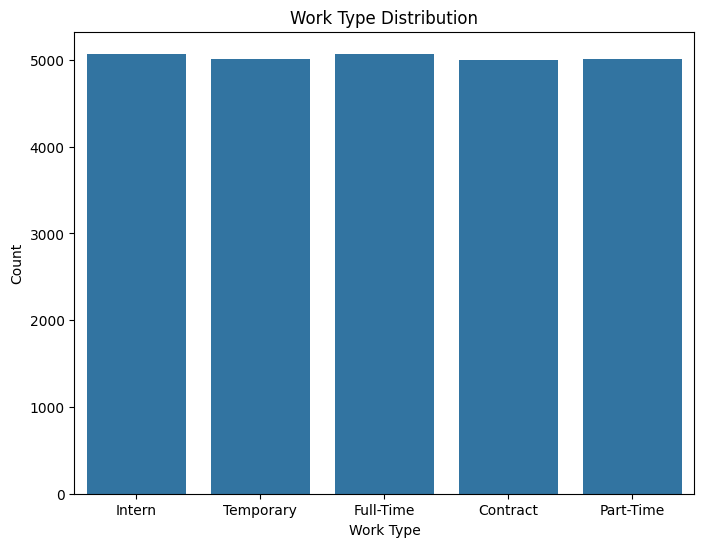

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_expanded, x='work_type')
plt.title('Work Type Distribution')
plt.xlabel('Work Type')
plt.ylabel('Count')

In [ ]:
data_expanded['work_type'].value_counts()

,count
work_type,
Full-Time,5071
Intern,5065
Part-Time,5008
Temporary,5006
Contract,4997


Average salary Distribution

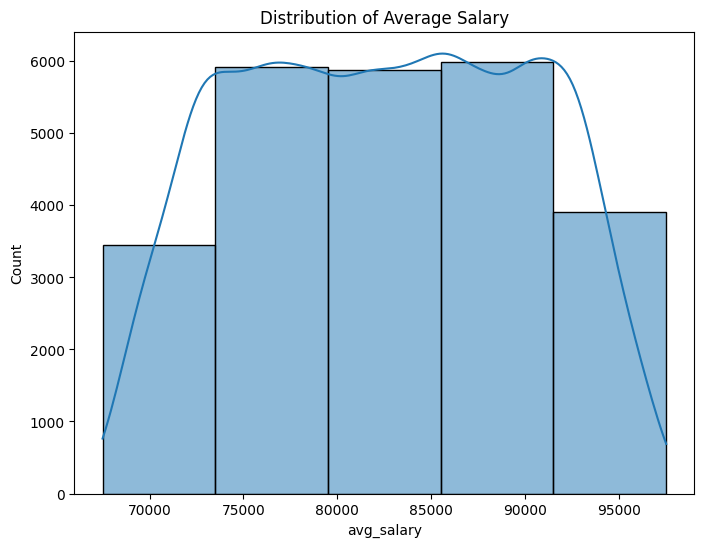

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data_expanded['avg_salary'], bins=5, kde=True)
plt.title('Distribution of Average Salary')
plt.show()

Qualification Distribution

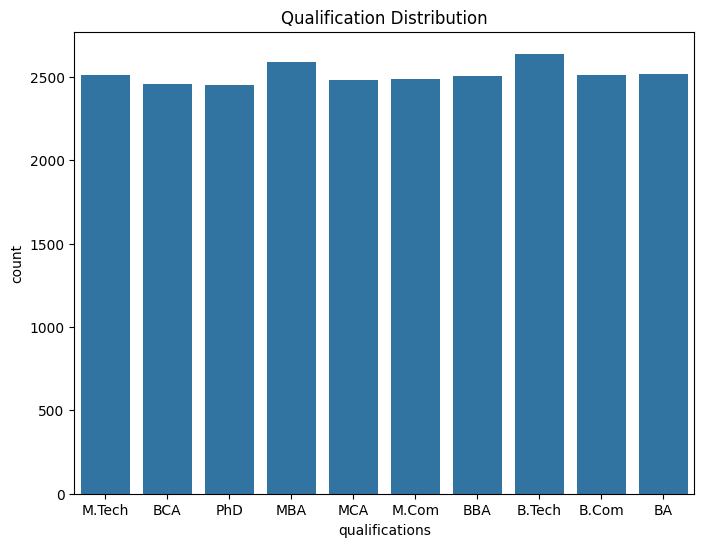

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_expanded, x='qualifications')
plt.title('Qualification Distribution')
plt.show()

Experience vs Average Salary

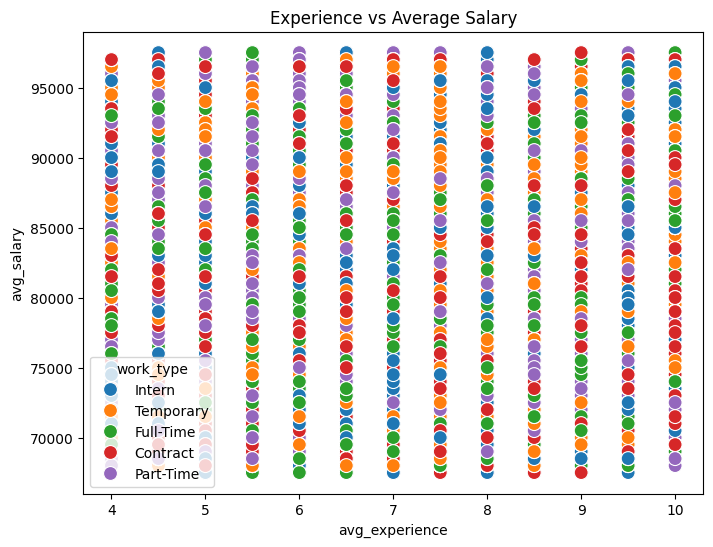

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_expanded, x='avg_experience', y='avg_salary', hue='work_type', s=100)
plt.title('Experience vs Average Salary')
plt.show()

Avg Salary by Work Type

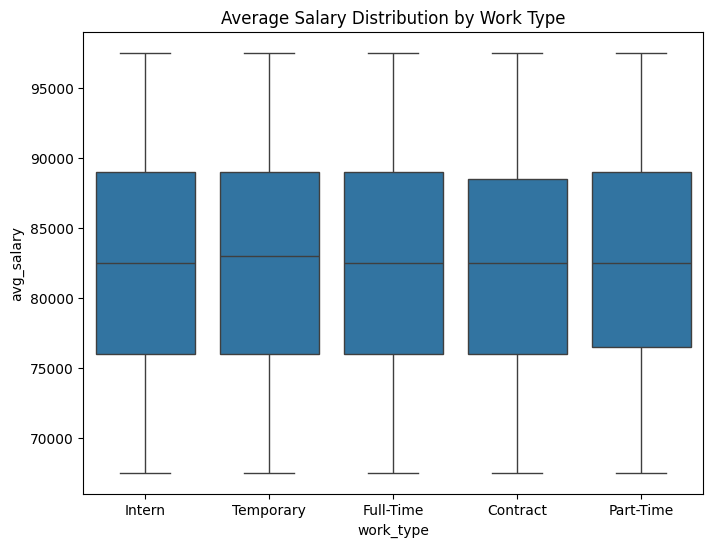

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_expanded, x='work_type', y='avg_salary')
plt.title('Average Salary Distribution by Work Type')
plt.show()

In [ ]:
data_expanded.groupby('work_type')['avg_salary'].describe()


,count,mean,std,min,25%,50%,75%,max
work_type,,,,,,,,
Contract,4997.0,82395.437262,7487.374160,67500.0,76000.0,82500.0,88500.0,97500.0
Full-Time,5071.0,82473.279432,7532.541230,67500.0,76000.0,82500.0,89000.0,97500.0
Intern,5065.0,82488.647581,7536.982244,67500.0,76000.0,82500.0,89000.0,97500.0
Part-Time,5008.0,82531.349840,7468.669372,67500.0,76500.0,82500.0,89000.0,97500.0
Temporary,5006.0,82613.064323,7525.600737,67500.0,76000.0,83000.0,89000.0,97500.0


<Axes: xlabel='work_type', ylabel='avg_salary'>

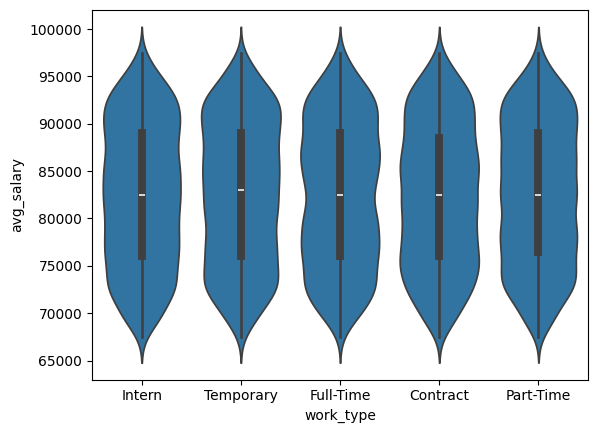

In [ ]:
sns.violinplot(data=data_expanded, x='work_type', y='avg_salary')


Min vs Max Salary Lineplot

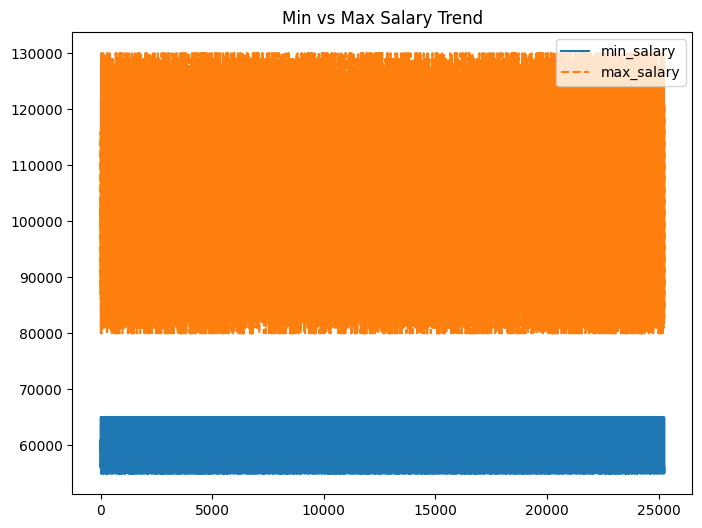

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=data_expanded[['min_salary', 'max_salary']])
plt.title('Min vs Max Salary Trend')
plt.show()

Text(0.5, 1.0, 'Min vs Max Salary Trend (Sampled)')

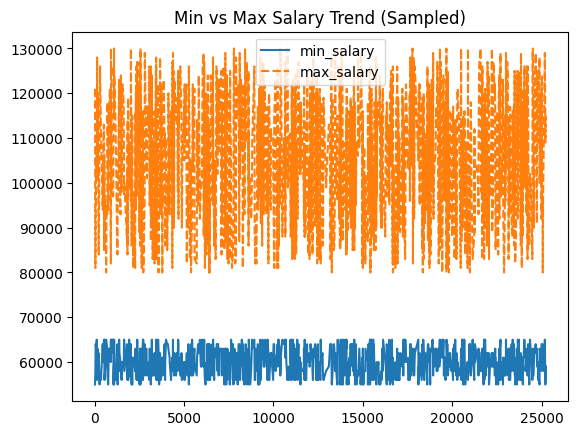

In [ ]:
sampled_df = data_expanded.sample(1000)  # Or 500 for more clarity
sns.lineplot(data=sampled_df[['min_salary', 'max_salary']])
plt.title("Min vs Max Salary Trend (Sampled)")


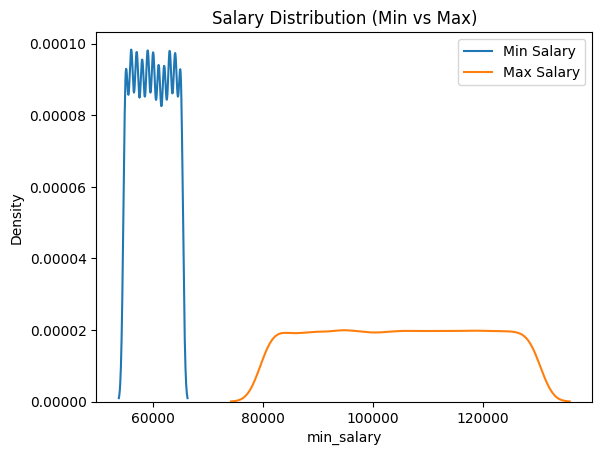

In [ ]:
sns.kdeplot(data_expanded['min_salary'], label='Min Salary')
sns.kdeplot(data_expanded['max_salary'], label='Max Salary')
plt.title('Salary Distribution (Min vs Max)')
plt.legend()


<Axes: xlabel='salary_gap', ylabel='Count'>

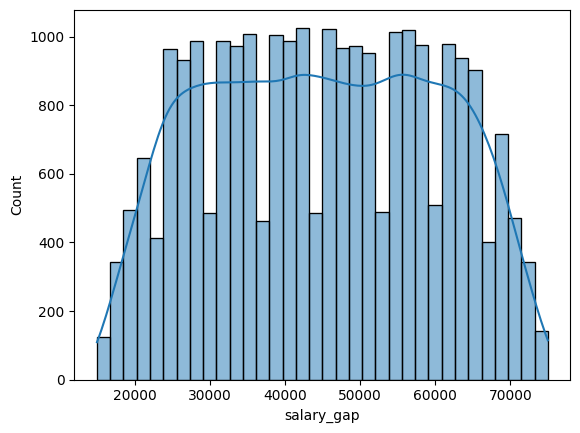

In [ ]:
data_expanded['salary_gap'] = data_expanded['max_salary'] - data_expanded['min_salary']
sns.histplot(data_expanded['salary_gap'], kde=True)


Correlation Heatmap

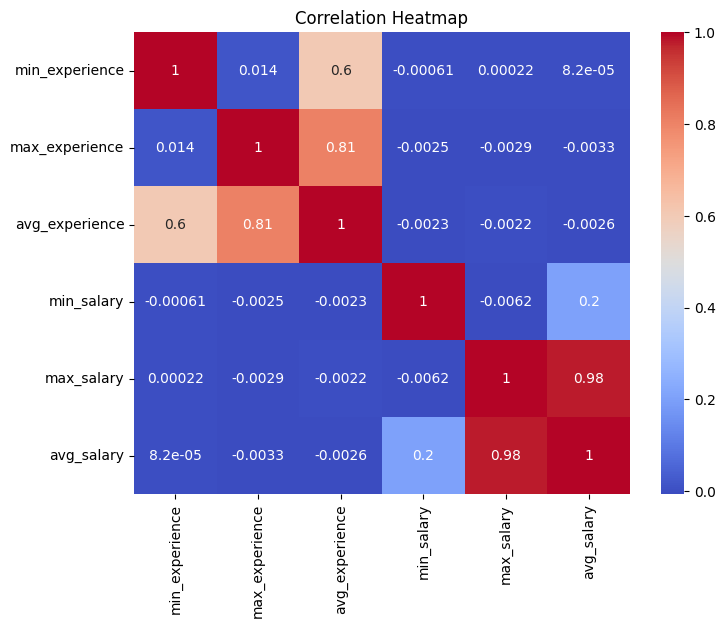

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_expanded[['min_experience', 'max_experience', 'avg_experience', 'min_salary', 'max_salary', 'avg_salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Experience Gap Distribution

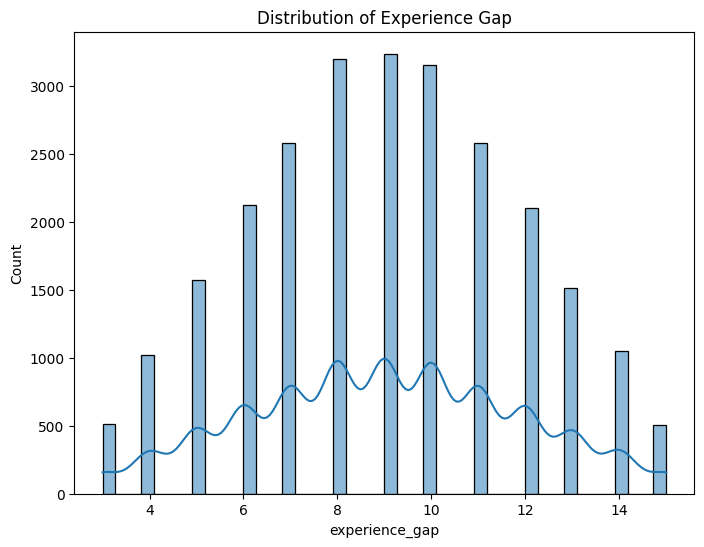

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data_expanded['experience_gap'], kde=True)
plt.title('Distribution of Experience Gap')
plt.show()